**Credit Scoring Model**

Develop a credit scoring model to predict the creditworthiness of individuals based on historical financial data. Utilize classification algorithms and assess the model's accuracy.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Libraries for the models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the dataset
df = pd.read_csv("/content/credit_score.csv")
df.head()

,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,C02COQEVYU,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,...,0.0000,0.0625,High,1,0,0,0,0,444,1
1,C02OZKC0ZF,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,...,0.7692,0.2222,No,1,0,0,1,0,625,0
2,C03FHP2D0A,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,...,1.4286,0.0578,High,1,0,0,1,0,469,1
3,C03PVPPHOY,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,...,1.2500,0.1282,High,1,0,0,1,0,559,0
4,C04J69MUX0,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,...,0.1163,0.0568,High,1,1,1,1,1,473,0


In [3]:
#Size of the dataset
df.shape

(1000, 87)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUST_ID                  1000 non-null   object 
 1   INCOME                   1000 non-null   int64  
 2   SAVINGS                  1000 non-null   int64  
 3   DEBT                     1000 non-null   int64  
 4   R_SAVINGS_INCOME         1000 non-null   float64
 5   R_DEBT_INCOME            1000 non-null   float64
 6   R_DEBT_SAVINGS           1000 non-null   float64
 7   T_CLOTHING_12            1000 non-null   int64  
 8   T_CLOTHING_6             1000 non-null   int64  
 9   R_CLOTHING               1000 non-null   float64
 10  R_CLOTHING_INCOME        1000 non-null   float64
 11  R_CLOTHING_SAVINGS       1000 non-null   float64
 12  R_CLOTHING_DEBT          1000 non-null   float64
 13  T_EDUCATION_12           1000 non-null   int64  
 14  T_EDUCATION_6            

In [5]:
df.describe(include='all')

,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
count,1000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
unique,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C02COQEVYU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,121610.019000,4.131896e+05,7.907180e+05,4.063477,6.068449,5.867252,6822.401000,3466.320000,0.454848,...,0.913340,0.605276,NaN,0.944000,0.236000,0.173000,0.993000,0.15000,586.712000,0.284000
std,NaN,113716.699591,4.429160e+05,9.817904e+05,3.968097,5.847878,16.788356,7486.225932,5118.942977,0.236036,...,1.625278,1.299382,NaN,0.230037,0.424835,0.378437,0.083414,0.35725,63.413882,0.451162
min,NaN,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.00000,300.000000,0.000000
25%,NaN,30450.250000,5.971975e+04,5.396675e+04,1.000000,1.454500,0.206200,1084.500000,319.500000,0.263950,...,0.158700,0.100000,NaN,1.000000,0.000000,0.000000,1.000000,0.00000,554.750000,0.000000
50%,NaN,85090.000000,2.738505e+05,3.950955e+05,2.545450,4.911550,2.000000,4494.000000,1304.000000,0.468850,...,0.327950,0.178600,NaN,1.000000,0.000000,0.000000,1.000000,0.00000,596.000000,0.000000
75%,NaN,181217.500000,6.222600e+05,1.193230e+06,6.307100,8.587475,4.509600,10148.500000,4555.500000,0.626300,...,0.833300,0.588200,NaN,1.000000,0.000000,0.000000,1.000000,0.00000,630.000000,1.000000


# **Preprocessing**

In [6]:
# Check for missing values
df.isnull().sum()

,0
CUST_ID,0
INCOME,0
SAVINGS,0
DEBT,0
R_SAVINGS_INCOME,0
...,...
CAT_MORTGAGE,0
CAT_SAVINGS_ACCOUNT,0
CAT_DEPENDENTS,0
CREDIT_SCORE,0


In [7]:
#Check total null values
df.isnull().sum().sum()

0

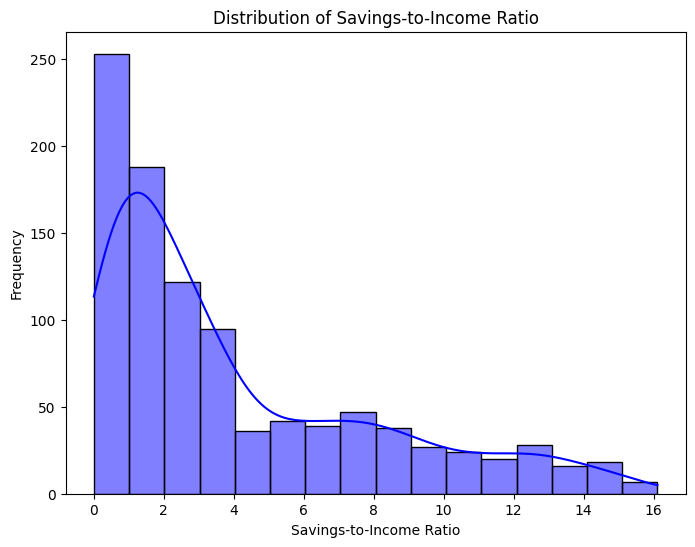

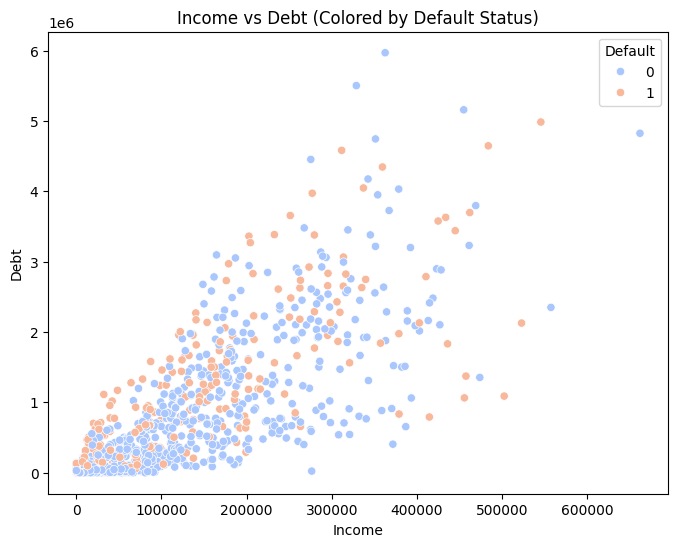

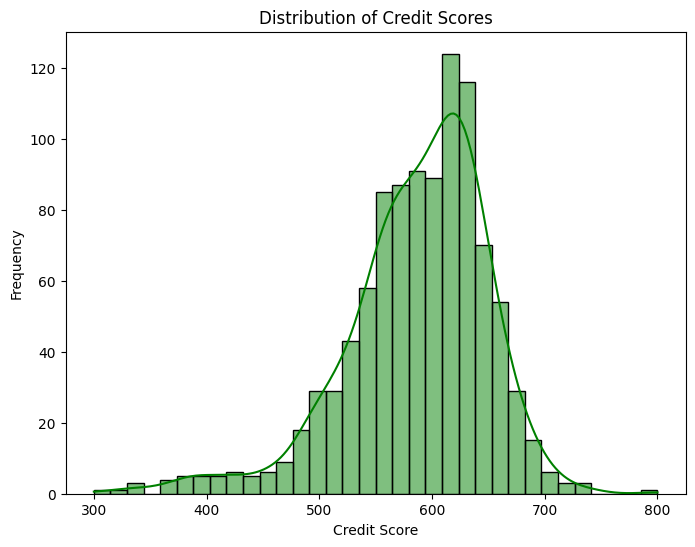

In [8]:
# Savings-to-Income Ratio Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['R_SAVINGS_INCOME'], kde=True, color='blue')
plt.title('Distribution of Savings-to-Income Ratio')
plt.xlabel('Savings-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()

# Income vs Debt Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['INCOME'], y=df['DEBT'], hue=df['DEFAULT'], palette='coolwarm')
plt.title('Income vs Debt (Colored by Default Status)')
plt.xlabel('Income')
plt.ylabel('Debt')
plt.legend(title='Default')
plt.show()

# Credit Score Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['CREDIT_SCORE'], kde=True, color='green')
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()



In [9]:
#Choose only important columns to use to make your df understandable
df= df[['INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME',
       'R_DEBT_INCOME', 'R_DEBT_SAVINGS','CREDIT_SCORE', 'DEFAULT']]

df

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,CREDIT_SCORE,DEFAULT
0,33269,0,532304,0.0000,16.0000,1.2000,444,1
1,77158,91187,315648,1.1818,4.0909,3.4615,625,0
2,30917,21642,534864,0.7000,17.3000,24.7142,469,1
3,80657,64526,629125,0.8000,7.8000,9.7499,559,0
4,149971,1172498,2399531,7.8182,16.0000,2.0465,473,0
...,...,...,...,...,...,...,...,...
995,328892,1465066,5501471,4.4546,16.7273,3.7551,418,0
996,81404,88805,680837,1.0909,8.3637,7.6667,589,1
997,0,42428,30760,3.2379,8.1889,0.7250,499,0
998,36011,8002,604181,0.2222,16.7777,75.5037,507,0


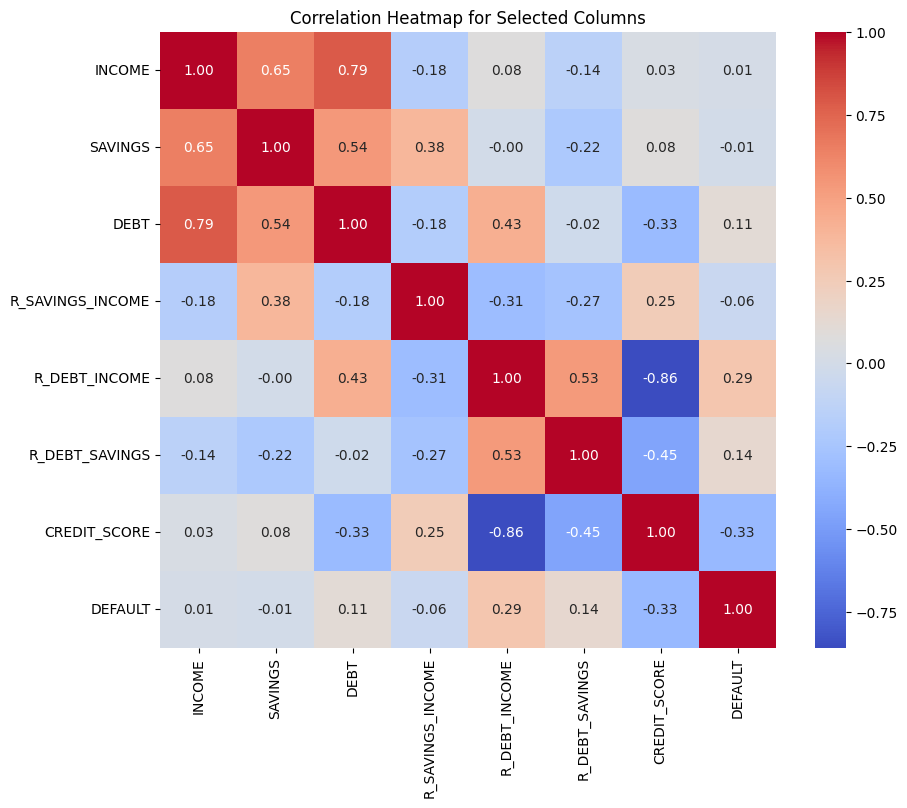

In [10]:
heatmap_data = df

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Correlation Heatmap for Selected Columns')
plt.show()


In [11]:
#Features that have different scales, we use standardization for better model performance
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_columns = ['INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME',
       'R_DEBT_INCOME', 'R_DEBT_SAVINGS']

# Apply standardization
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,CREDIT_SCORE,DEFAULT
0,-0.777240,-0.933351,-0.263339,-1.024549,1.699167,-0.278144,444,1
1,-0.391097,-0.727370,-0.484123,-0.726575,-0.338334,-0.143371,625,0
2,-0.797934,-0.884465,-0.260730,-0.848054,1.921581,1.123182,469,1
3,-0.360312,-0.787594,-0.164673,-0.822840,0.296247,0.231386,559,0
4,0.249525,1.715197,1.639472,0.946701,1.699167,-0.227697,473,0
...,...,...,...,...,...,...,...,...
995,1.823705,2.376077,4.800526,0.098616,1.823599,-0.125874,418,0
996,-0.353740,-0.732750,-0.111975,-0.749494,0.392689,0.107238,589,1
997,-1.069947,-0.837511,-0.774441,-0.208158,0.362783,-0.306452,499,0
998,-0.753116,-0.915276,-0.190092,-0.968525,1.832222,4.149977,507,0


**Build and train Models**

In [12]:
# Separate features and target
X = df.drop("DEFAULT", axis=1)
y = df["DEFAULT"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


# MODEL 1: Confusion Matrix

Model Accuracy: 67.50%
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       146
           1       0.35      0.24      0.29        54

    accuracy                           0.68       200
   macro avg       0.55      0.54      0.54       200
weighted avg       0.64      0.68      0.65       200



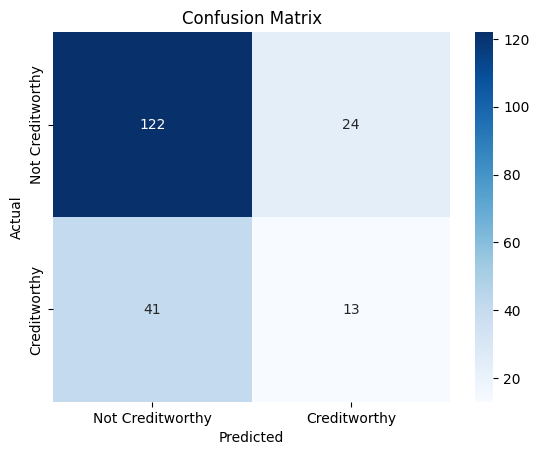

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


print("Classification Report:")
print(classification_report(y_test, y_pred))


import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Creditworthy', 'Creditworthy'], yticklabels=['Not Creditworthy', 'Creditworthy'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# MODEL 2: Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X, y)

y_pred = logistic_model.predict(X)
print("Logistic Regression Accuracy:", accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

Logistic Regression Accuracy: 0.738
              precision    recall  f1-score   support

           0       0.74      0.97      0.84       716
           1       0.66      0.16      0.26       284

    accuracy                           0.74      1000
   macro avg       0.70      0.56      0.55      1000
weighted avg       0.72      0.74      0.67      1000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Model 3: Support Vector Machine (SVM)

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_model = SVC(kernel='rbf', probability=True, random_state=42)

svm_model.fit(X_train, y_train)

y_pred_proba = svm_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.5).astype(int)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", f"{accuracy * 100:.2f}%")


              precision    recall  f1-score   support

           0       0.76      0.95      0.85       146
           1       0.61      0.20      0.31        54

    accuracy                           0.75       200
   macro avg       0.69      0.58      0.58       200
weighted avg       0.72      0.75      0.70       200

Accuracy: 75.00%


# MODEL 4: Neural Networks

In [17]:
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)


print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3164 - loss: 63.9011 - val_accuracy: 0.2688 - val_loss: 44.2703
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2968 - loss: 35.0911 - val_accuracy: 0.2688 - val_loss: 14.9403
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3374 - loss: 8.7036 - val_accuracy: 0.7312 - val_loss: 0.6802
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7021 - loss: 0.6814 - val_accuracy: 0.7312 - val_loss: 0.6782
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7141 - loss: 0.6790 - val_accuracy: 0.7312 - val_loss: 0.6767
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7162 - loss: 0.6774 - val_accuracy: 0.7312 - val_loss: 0.6750
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7030 - loss: 0.6770 - val_accuracy: 0.7312 - val_loss: 0.6734
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7118 - loss: 0.6747 - val_accuracy: 0.7312 -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Deploy the Best Model**

In [18]:
import joblib

joblib.dump(svm_model, 'credit_scoring_model.pkl')


['credit_scoring_model.pkl']